In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
in_dir = Path('../data/logs/step_log_2023-12-13_06-26.csv')

In [4]:
logs = [pd.read_csv('../../data/logs/step_log_2023-12-13_06-26.csv')]

In [5]:
# logs = []

# for f in in_dir.iterdir():
#     try:
#         this_log = pd.read_csv(f)
#     except:
#         print(f)

#     if '12-11_05-10' not in f.name:
#        continue

#     logs.append(this_log)

In [6]:
all_logs = pd.concat(logs)

In [7]:
all_logs['Unmet Demand'].min()

24816646.0

In [8]:
all_logs = all_logs.reset_index()

In [9]:
all_logs['Unmet Demand'].argmin()

3409

In [10]:
all_logs

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
0,0,NaN,NaN,NaN,4646.0,wind,0.0,23444.0,57164055.0
1,1,NaN,NaN,NaN,15459.0,solar,0.0,532074.0,56655425.0
2,2,NaN,NaN,NaN,15158.0,solar,0.0,1033769.0,56153730.0
3,3,NaN,NaN,NaN,14053.0,wind,0.0,1065029.0,56122470.0
4,4,NaN,NaN,NaN,4741.0,wind,0.0,1097004.0,56090495.0
...,...,...,...,...,...,...,...,...,...
36202,36202,NaN,NaN,NaN,15626.0,solar,0.0,56870924.0,26646689.0
36203,36203,NaN,NaN,NaN,8234.0,wind,0.0,56966042.0,26587354.0
36204,36204,NaN,NaN,NaN,5837.0,wind,0.0,56996021.0,26566040.0
36205,36205,NaN,NaN,NaN,17142.0,solar,0.0,57512821.0,26532564.0


In [11]:
import numpy as np

rewards = []
best_unmet = []

for idx, row in all_logs.iterrows():
    #print(','.join([str(i) for i in row.values]))

    if not np.isnan(row.values[2]):
        rewards.append(row.values[2])
        best_unmet.append(all_logs.loc[idx-1, 'Unmet Demand'])

In [33]:
def plot_with_moving_average(reward, unmet_demand, window_size=5):
    """
    Plots the original data along with its moving average.

    Parameters:
    - data: A list or array of data points.
    - window_size: The window size for the moving average.
    """
    # Convert the data to a pandas Series
    reward_series = pd.Series(reward)
    demand_series = pd.Series(unmet_demand)

    # Calculate the moving average
    moving_avg_reward = reward_series.rolling(window=window_size).mean()
    moving_avg_demand = demand_series.rolling(window=window_size).mean()

    fig, ax = plt.subplots(figsize=(12, 6))
    ax2 = ax.twinx()
    
    ax.plot(moving_avg_reward, label='reward')
    ax2.plot(moving_avg_demand, color='red', label='unmet demand')
    
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # # Plotting
    # plt.figure(figsize=(12, 6))
    # plt.plot(data_series, label='Original Data')
    # plt.plot(moving_avg, label='Moving Average (Window Size {})'.format(window_size), color='red')
    # plt.xlabel('Data Point Index')
    # plt.ylabel('Value')
    # plt.title('Original Data and Moving Average')
    # plt.legend()
    #plt.show()


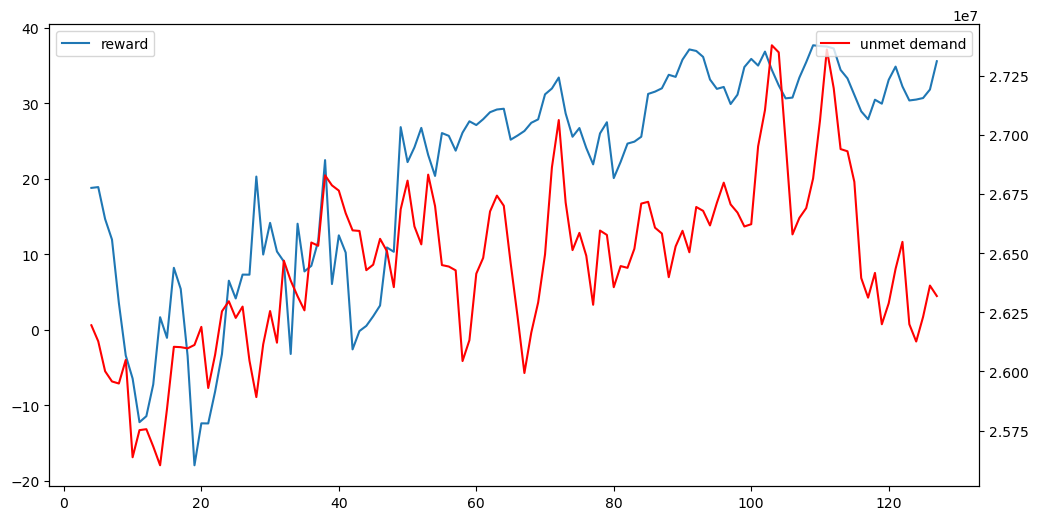

In [39]:
plot_with_moving_average(rewards, best_unmet, window_size=5)

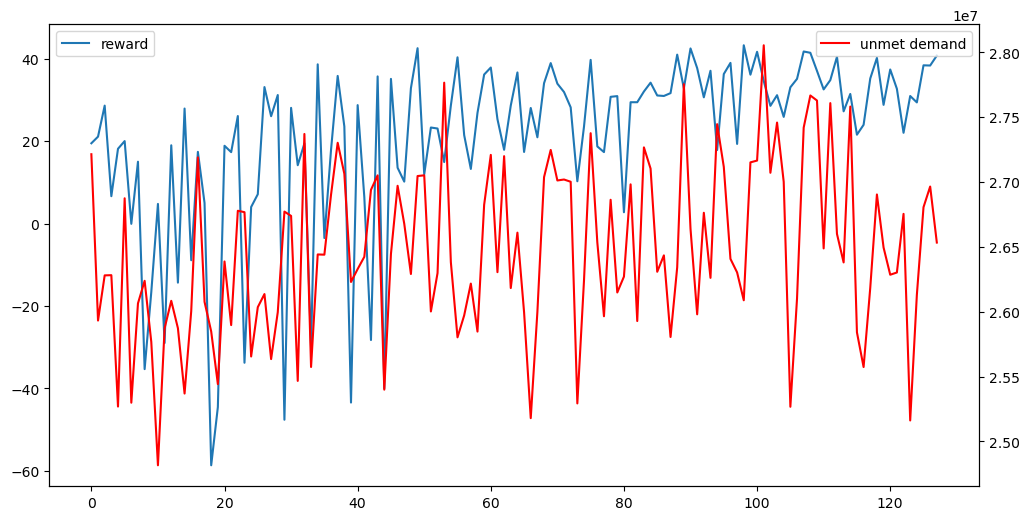

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

ax.plot(rewards, label='reward')
ax2.plot(best_unmet, color='red', label='unmet demand')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

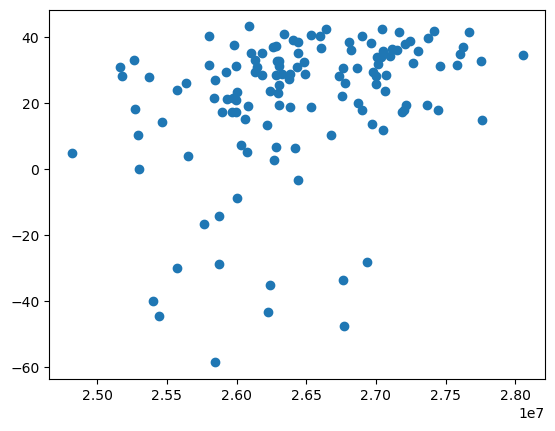

In [13]:
%matplotlib inline



plt.scatter(best_unmet, rewards)

In [14]:
filtered_reward = [reward for reward, unmet in zip(rewards, best_unmet) if reward > 3e6 and unmet < 4e7]
filtered_unmet = [unmet for reward, unmet in zip(rewards, best_unmet) if reward > 3e6 and unmet < 4e7]

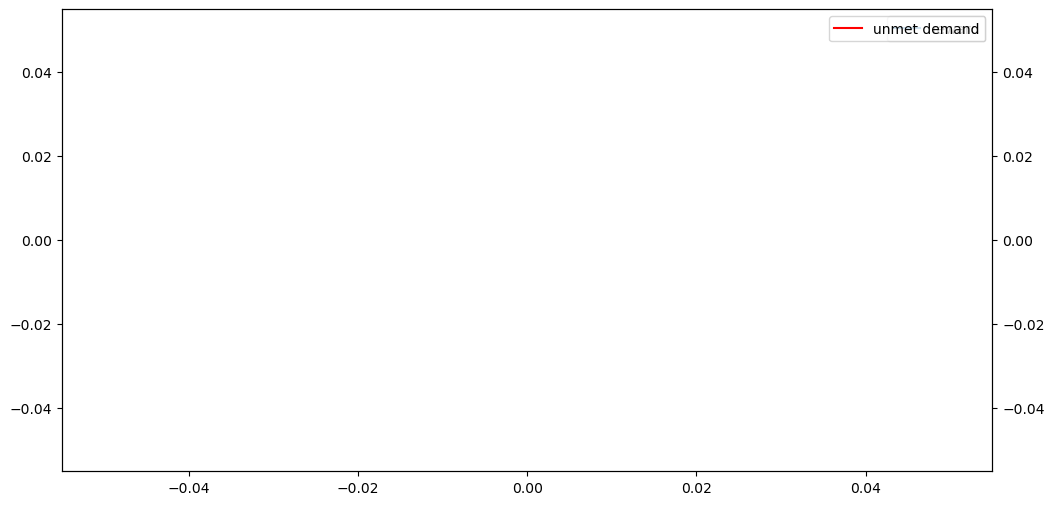

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

ax.plot(filtered_reward, label='reward')
ax2.plot(filtered_unmet, color='red', label='unmet demand')

ax.legend()
ax2.legend(loc='upper right')

In [16]:
all_logs['Episode'] = all_logs['Episode'].bfill()
all_logs['Total Reward'] = all_logs['Total Reward'].bfill()

In [17]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 2).sum()

1572

In [18]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 1).sum()

32634

In [19]:
all_logs

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
0,0,1.0,19.467458,NaN,4646.0,wind,0.0,23444.0,57164055.0
1,1,1.0,19.467458,NaN,15459.0,solar,0.0,532074.0,56655425.0
2,2,1.0,19.467458,NaN,15158.0,solar,0.0,1033769.0,56153730.0
3,3,1.0,19.467458,NaN,14053.0,wind,0.0,1065029.0,56122470.0
4,4,1.0,19.467458,NaN,4741.0,wind,0.0,1097004.0,56090495.0
...,...,...,...,...,...,...,...,...,...
36202,36202,128.0,40.742450,NaN,15626.0,solar,0.0,56870924.0,26646689.0
36203,36203,128.0,40.742450,NaN,8234.0,wind,0.0,56966042.0,26587354.0
36204,36204,128.0,40.742450,NaN,5837.0,wind,0.0,56996021.0,26566040.0
36205,36205,128.0,40.742450,NaN,17142.0,solar,0.0,57512821.0,26532564.0


In [20]:
action_type_agg_count = all_logs.groupby(by=['Episode', 'Action Type']).size()
action_type_agg_count.name = 'count'
action_type_agg_count = action_type_agg_count.reset_index()

unmet_demand = all_logs.groupby(by='Episode').agg({'Unmet Demand': 'min'})
total_reward = all_logs.groupby(by='Episode').agg({'Total Reward': 'last'})

action_type_agg_count = action_type_agg_count.merge(unmet_demand, on='Episode', how='left')
action_type_agg_count = action_type_agg_count.merge(total_reward, on='Episode', how='left')

Text(0, 0.5, 'Unmet Demand at End of Episode')

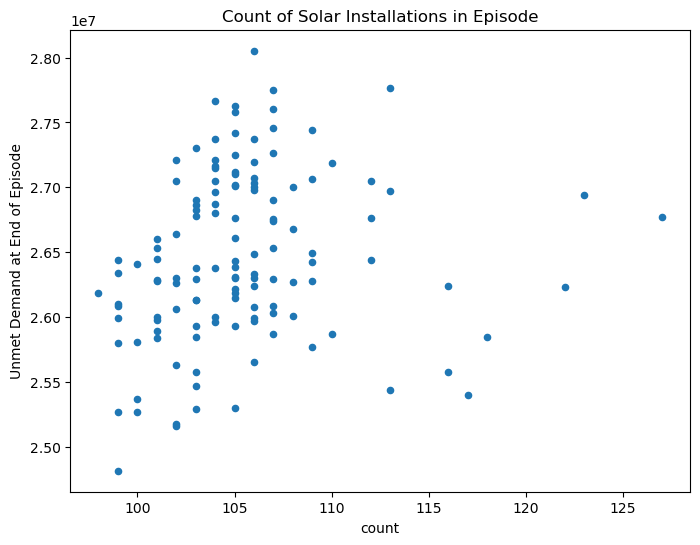

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Unmet Demand', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Unmet Demand at End of Episode')

Text(0, 0.5, 'Total Reward at End of Episode')

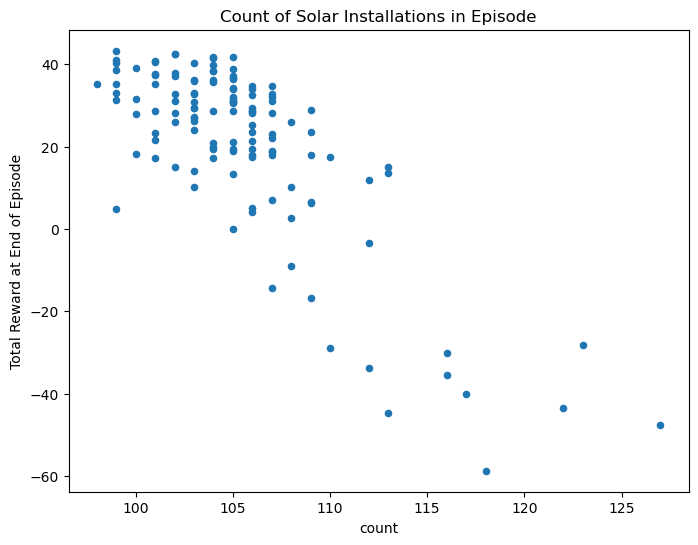

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Total Reward', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Total Reward at End of Episode')

In [23]:
action_type_agg_count.sort_values(by='Unmet Demand')

,Episode,Action Type,count,Unmet Demand,Total Reward
21,11.0,wind,241,24816646.0,4.750207
20,11.0,solar,99,24816646.0,4.750207
246,124.0,solar,102,25161972.0,30.933977
247,124.0,wind,197,25161972.0,30.933977
133,67.0,wind,221,25179779.0,28.033606
...,...,...,...,...,...
179,90.0,wind,134,27753176.0,32.793980
107,54.0,wind,134,27764564.0,14.911046
106,54.0,solar,113,27764564.0,14.911046
202,102.0,solar,106,28052678.0,34.577749


In [24]:
action_type_agg_count.sort_values(by='Episode')

,Episode,Action Type,count,Unmet Demand,Total Reward
1,1.0,wind,163,27213201.0,19.467458
0,1.0,solar,104,27213201.0,19.467458
2,2.0,solar,105,25931810.0,21.076715
3,2.0,wind,199,25931810.0,21.076715
4,3.0,solar,101,26279810.0,28.600871
...,...,...,...,...,...
250,126.0,solar,104,26805146.0,38.382744
253,127.0,wind,142,26964309.0,38.331690
252,127.0,solar,104,26964309.0,38.331690
254,128.0,solar,101,26532564.0,40.742450
